# Data science pipeline: pandas, seaborn, scikit-learn


**Note:** This notebook uses python version 3.9.5 and sklearn version 0.24.2

## Agenda
1. Import the libraries
2. Read the dataset

3. Perform EDA
4. What is linear regression, and how does it work?
5. Split the data to independent and dependent
6. Split the data to train and test
7. Apply multiple linear regression on train set
8. Model interpretation
9. Model evaluation using different accuracy metrics
10. Anova table
11. Hypothesis testing
12. Residual plot

## Importing necessary libraries 

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.formula.api import ols
from yellowbrick.regressor import ResidualsPlot

In [2]:
dataset_df = pd.read_csv(r'C:\Users\acer\OneDrive - SP JAIN SCHOOL OF GLOBAL MANAGEMENT\Second_Semester\Statistical Data Analysis\Project\boston-home.csv')
dataset_df.head()

,CRIM,ZN,RM,AGE,RAD,TAX,LSTAT,MEDV
0,0.00632,18.0,6.575,65.2,1,296,4.98,24.0
1,0.02731,0.0,6.421,78.9,2,242,9.14,21.6
2,0.02729,0.0,7.185,61.1,2,242,4.03,34.7
3,0.03237,0.0,6.998,45.8,3,222,2.94,33.4
4,0.06905,0.0,7.147,54.2,3,222,5.33,36.2


In [3]:
dataset_df.shape

(506, 8)

In [4]:
dataset_df.columns

Index(['CRIM', 'ZN', 'RM', 'AGE', 'RAD', 'TAX', 'LSTAT', 'MEDV'], dtype='object')

## Exploratory Data Analysis 

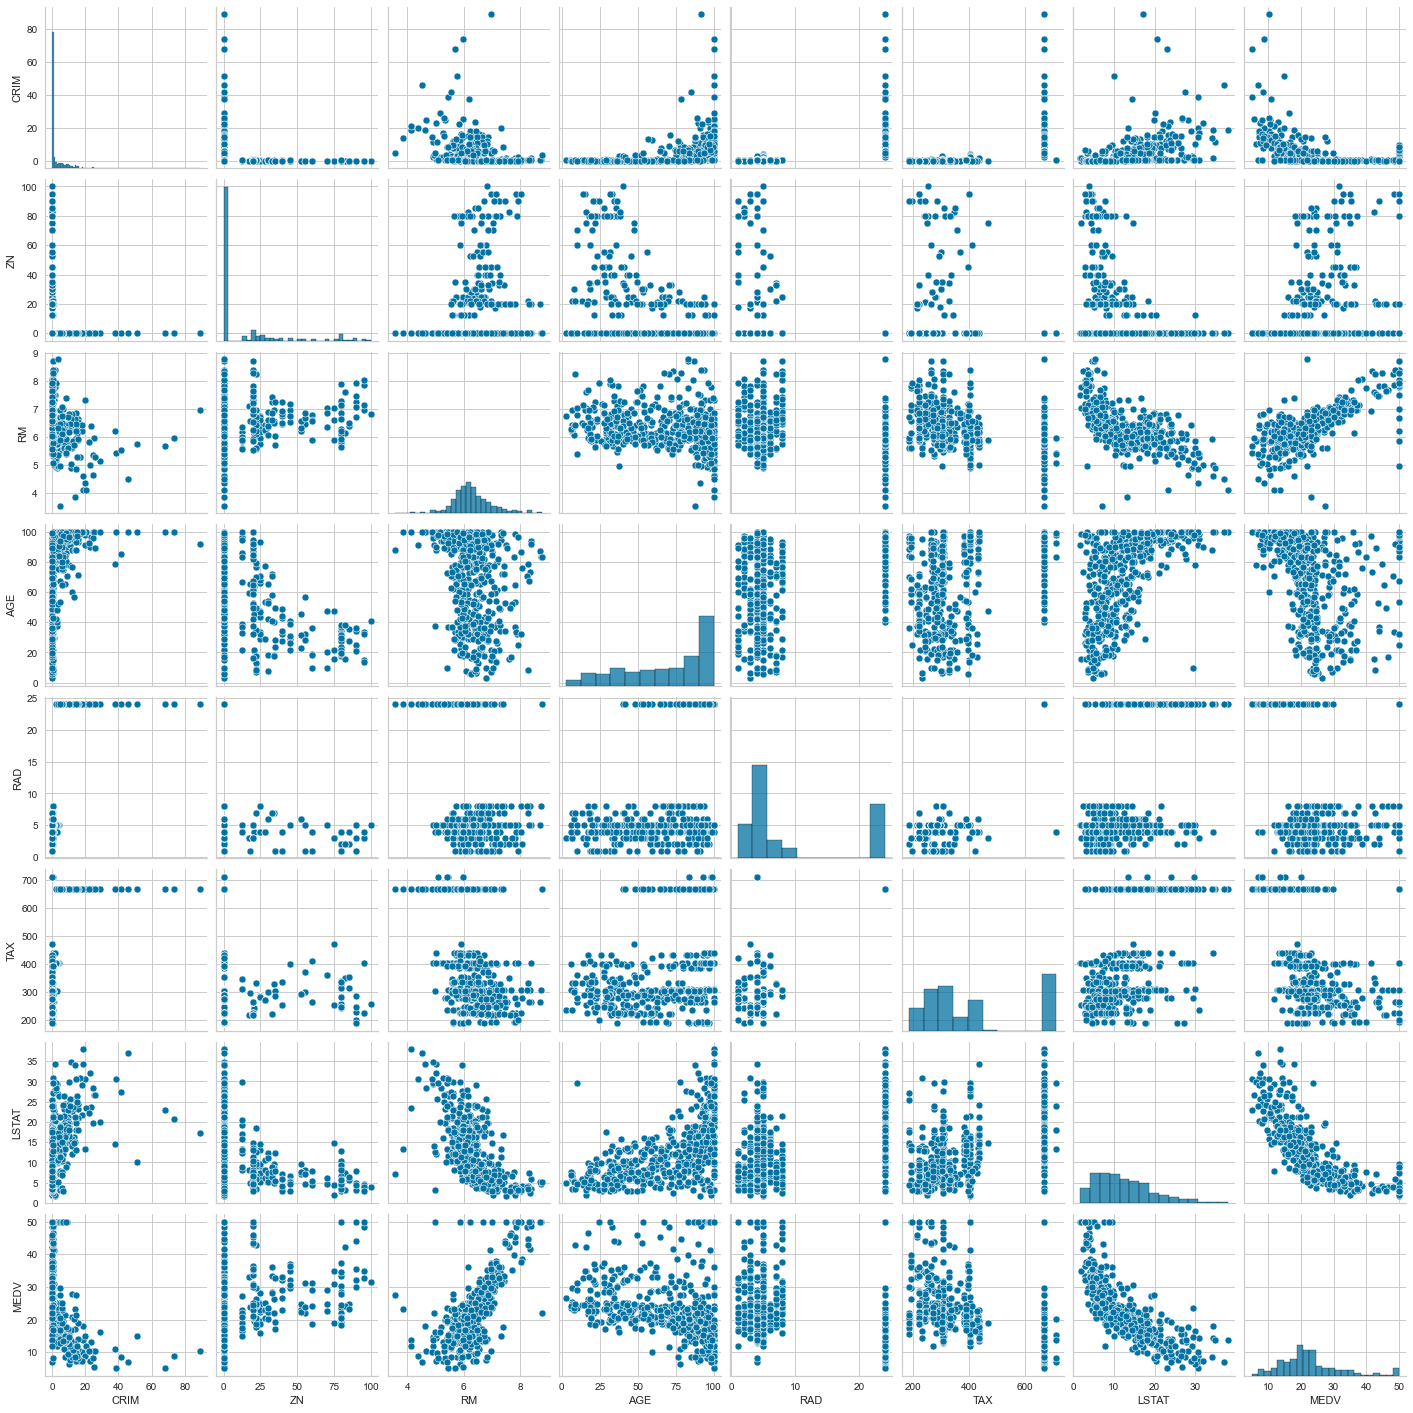

In [5]:
sns.pairplot(dataset_df)
plt.show()

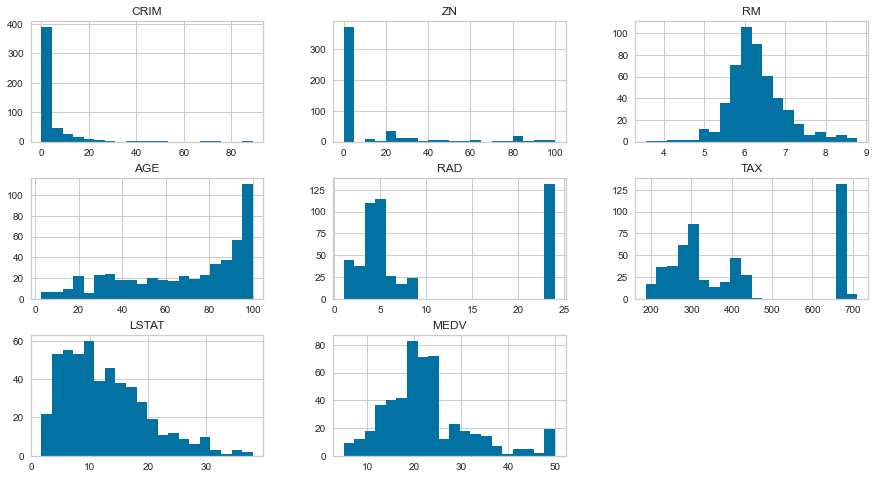

In [6]:
# Histrogram represents distribtuion of numerical columns in the train set
dataset_df.hist(alpha=1, figsize=(15, 8), bins=20)
plt.show()

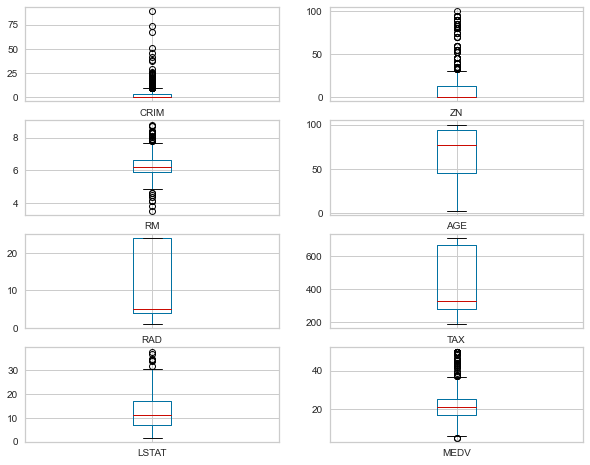

In [7]:
dataset_df.plot(kind='box', subplots=True, layout=(4,2), sharex=False, sharey=False, figsize = (10,8))
plt.show()

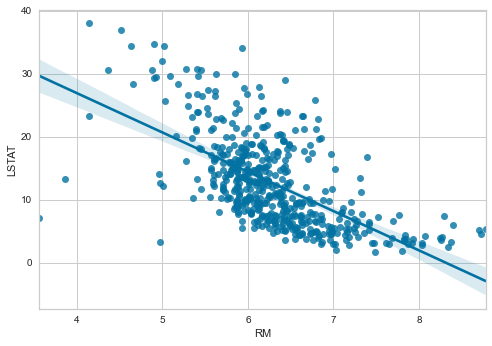

In [8]:
sns.regplot(x='RM', y='LSTAT', data=dataset_df)
plt.show()

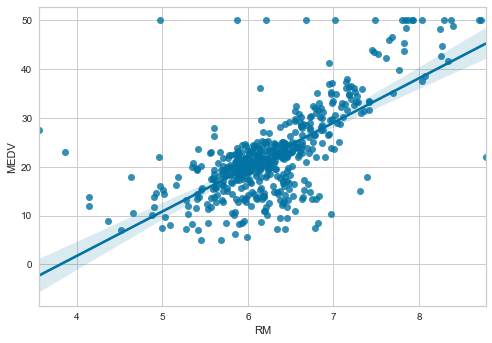

In [9]:
sns.regplot(x='RM', y='MEDV', data=dataset_df)
plt.show()

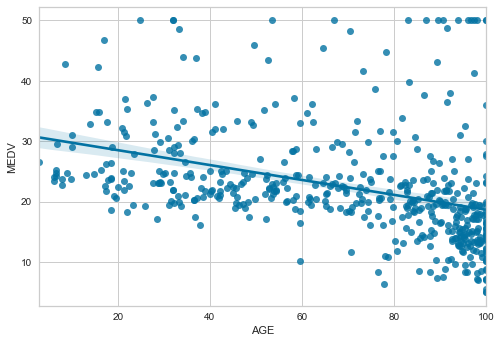

In [10]:
sns.regplot(x='AGE', y='MEDV', data=dataset_df)
plt.show()

In [11]:
dataset_df.describe()

,CRIM,ZN,RM,AGE,RAD,TAX,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,6.284634,68.574901,9.549407,408.237154,12.653063,22.532806
std,8.601545,23.322453,0.702617,28.148861,8.707259,168.537116,7.141062,9.197104
min,0.006320,0.000000,3.561000,2.900000,1.000000,187.000000,1.730000,5.000000
25%,0.082045,0.000000,5.885500,45.025000,4.000000,279.000000,6.950000,17.025000
50%,0.256510,0.000000,6.208500,77.500000,5.000000,330.000000,11.360000,21.200000
75%,3.677083,12.500000,6.623500,94.075000,24.000000,666.000000,16.955000,25.000000
max,88.976200,100.000000,8.780000,100.000000,24.000000,711.000000,37.970000,50.000000


In [12]:
dataset_df.isnull().sum().to_frame(name='Number of missing values')

,Number of missing values
CRIM,0
ZN,0
RM,0
AGE,0
RAD,0
TAX,0
LSTAT,0
MEDV,0


In [13]:
df_cor = dataset_df.corr().round(2)
df_cor.MEDV.to_frame('Attribute Correlation with Target')

,Attribute Correlation with Target
CRIM,-0.39
ZN,0.36
RM,0.70
AGE,-0.38
RAD,-0.38
TAX,-0.47
LSTAT,-0.74
MEDV,1.00


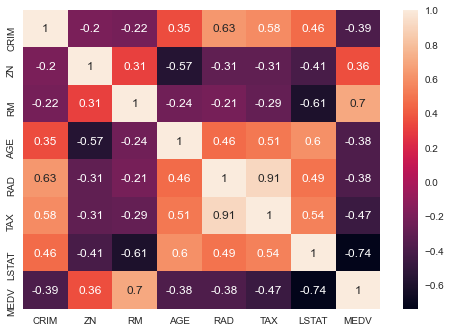

In [14]:
sns.heatmap(df_cor, annot=True)
plt.show()

## Linear regression

**Pros:** fast, no tuning required, highly interpretable, well-understood

**Cons:** unlikely to produce the best predictive accuracy (presumes a linear relationship between the features and response)

### Form of multiple linear regression

$y = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n$

- $y$ is the response
- $\beta_0$ is the intercept
- $\beta_1$ is the coefficient for $x_1$ (the first feature)
- $\beta_n$ is the coefficient for $x_n$ (the nth feature)

In this case:

$y = \beta_0 + \beta_1 \times CRIM + \beta_2 \times ZN + \beta_3 \times RM + \beta_4 \times AGE + \beta_5 \times RAD + \beta_6 \times TAX + \beta_3 \times LSTAT$

The $\beta$ values are called the **model coefficients**. These values are "learned" during the model fitting step using the "least squares" criterion. Then, the fitted model can be used to make predictions!

## Splitting into dependent and independent variables

In [15]:
x = dataset_df.iloc[:, 0:7].values
y = dataset_df.iloc[:, -1].values

In [16]:
x.shape, x

((506, 7),
 array([[6.3200e-03, 1.8000e+01, 6.5750e+00, ..., 1.0000e+00, 2.9600e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 6.4210e+00, ..., 2.0000e+00, 2.4200e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.1850e+00, ..., 2.0000e+00, 2.4200e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 6.9760e+00, ..., 1.0000e+00, 2.7300e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 6.7940e+00, ..., 1.0000e+00, 2.7300e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 6.0300e+00, ..., 1.0000e+00, 2.7300e+02,
         7.8800e+00]]))

In [17]:
y.shape, y

((506,),
 array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
        19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
        20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
        23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
        33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
        21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
        20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
        23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
        15.6, 11.8, 13.8, 15.

## Splitting X and y into training and testing sets

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [19]:
# default split is 80% for training and 20% for testing
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((404, 7), (102, 7), (404,), (102,))

In [20]:
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

In [21]:
print(lr.intercept_.round(3))
print(lr.coef_.round(3))

5.58
[-0.087  0.038  4.123  0.038  0.187 -0.014 -0.615]


In [22]:
features = ['CRIM', 'ZN', 'RM', 'AGE', 'RAD', 'TAX', 'LSTAT']
list(zip(features, lr.coef_.round(3)))

[('CRIM', -0.087),
 ('ZN', 0.038),
 ('RM', 4.123),
 ('AGE', 0.038),
 ('RAD', 0.187),
 ('TAX', -0.014),
 ('LSTAT', -0.615)]

$$y = 5.58 - 0.087 \times CRIM + 0.038 \times ZN + 4.123 \times RM + 0.038 \times AGE + 0.187 \times RAD - 0.014 \times TAX - 0.615 \times LSTAT$$

How do we interpret the **CRIM coefficient** (0.087)?

-  **a "unit" increase in crime rate per capita by town** is associated with a **0.087 "unit" decrease in Sales**.

Important notes:

- This is a statement of **association**, not **causation**.
- If an increase in crime rate was associated with a **increase** in sales, $\beta_1$ would be **positive**.

## Model evaluation metrics for regression

Evaluation metrics for classification problems, such as **accuracy**, are not useful for regression problems. Instead, we need evaluation metrics designed for comparing continuous values.

Let's create some example numeric predictions, and calculate **three common evaluation metrics** for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

In [23]:
print('Mean absolute error: ', mean_absolute_error(y_test, y_pred).round(2))

Mean absolute error:  4.34


**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

In [24]:
print('Mean squared error: ', mean_squared_error(y_test, y_pred).round(2))

Mean squared error:  30.17


**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

In [25]:
print('Root mean squared error: ', np.mean(mean_squared_error(y_test, y_pred)).round(2))

Root mean squared error:  30.17


In [26]:
performance = pd.DataFrame({'Evaluation Metric': ['MAE', 'MSE', 'RMSE'], 'Accuracy':[4.34, 30.17, 30.17]}) 
performance

,Evaluation Metric,Accuracy
0,MAE,4.34
1,MSE,30.17
2,RMSE,30.17


In [27]:
x2 = sm.add_constant(x_train)
model = sm.OLS(y_train, x2)
est2 = model.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.649
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     104.6
Date:                Tue, 31 Aug 2021   Prob (F-statistic):           5.41e-86
Time:                        16:29:41   Log-Likelihood:                -1248.9
No. Observations:                 404   AIC:                             2514.
Df Residuals:                     396   BIC:                             2546.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.5801      3.748      1.489      0.1

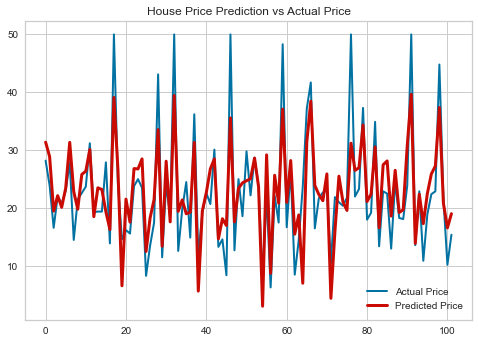

In [28]:
plt.plot(y_test, color='b', label='Actual Price', linewidth=2, markersize=8)
plt.plot(y_pred, color='r', label='Predicted Price', linewidth=3, markersize=10)
plt.legend()
plt.title('House Price Prediction vs Actual Price')
plt.show()

## Hypothesis testing

In [29]:
class Stats:
    def __init__(self, X, y, model):
        self.data = X
        self.target = y
        self.model = model
        ## degrees of freedom population dep. variable variance
        self._dft = X.shape[0] - 1   
        ## degrees of freedom population error variance
        self._dfe = X.shape[0] - X.shape[1] - 1  
    
    def sse(self):
        '''returns sum of squared errors (model vs actual)'''
        squared_errors = (self.target - self.model.predict(self.data)) ** 2
        return np.sum(squared_errors)
        
    def sst(self):
        '''returns total sum of squared errors (actual vs avg(actual))'''
        avg_y = np.mean(self.target)
        squared_errors = (self.target - avg_y) ** 2
        return np.sum(squared_errors)
    
    def r_squared(self):
        '''returns calculated value of r^2'''
        return 1 - self.sse()/self.sst()
    
    def adj_r_squared(self):
        '''returns calculated value of adjusted r^2'''
        return 1 - (self.sse()/self._dfe) / (self.sst()/self._dft)

In [30]:
stats = Stats(x_train, y_train, lr)

In [31]:
stats.sse().round(3)

11455.023

In [32]:
stats.sst().round(3)

32635.68

In [33]:
stats.r_squared().round(3)

0.649

In [34]:
stats.adj_r_squared().round(3)

0.643

## Residual Plot

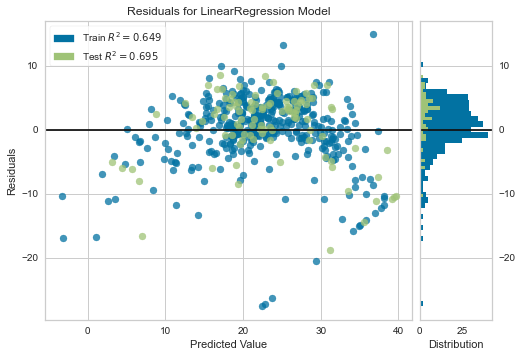

In [35]:
# Instantiate the linear model and visualizer
model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(x_train, y_train)  # Fit the training data to the visualizer
visualizer.score(x_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure
plt.show()